In [10]:
import numpy as np

def get_data(batch_size):
    while True:
        y_train = np.random.choice([0,1], (batch_size, 1))
        x_train = np.random.randn(batch_size, 1) + (2 * y_train - 1)
        yield x_train, y_train

In [11]:
datagen = get_data(32)

In [15]:
x, y = next(datagen)

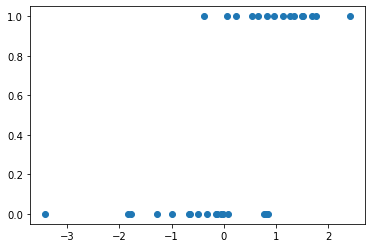

In [23]:
plt.scatter(x, y);

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential([Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy', 
              optimizer='sgd',
             metrics = ['acc'])

In [39]:
# Using fit_generator we have to define the number of steps_per_epoch, because the model
# does not know the data size. In this case we define 1000 iterations as 1 epoch

history = model.fit_generator(datagen, steps_per_epoch=1000, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 1s 628us/step - loss: 0.4684 - acc: 0.8441
Epoch 2/10
1000/1000 [==============================] - 1s 660us/step - loss: 0.3586 - acc: 0.8454
Epoch 3/10
1000/1000 [==============================] - 1s 658us/step - loss: 0.3626 - acc: 0.8374
Epoch 4/10
1000/1000 [==============================] - 1s 654us/step - loss: 0.3606 - acc: 0.8406
Epoch 5/10
1000/1000 [==============================] - 1s 668us/step - loss: 0.3593 - acc: 0.8402
Epoch 6/10
1000/1000 [==============================] - 1s 660us/step - loss: 0.3590 - acc: 0.8403
Epoch 7/10
1000/1000 [==============================] - 1s 641us/step - loss: 0.3550 - acc: 0.8407
Epoch 8/10
1000/1000 [==============================] - 1s 665us/step - loss: 0.3669 - acc: 0.8360
Epoch 9/10
1000/1000 [==============================] - 1s 666us/step - loss: 0.3602 - acc: 0.8415
Epoch 10/10
1000/1000 [==============================] - 1s 648us/step - loss: 0.3584 - acc: 0.8402


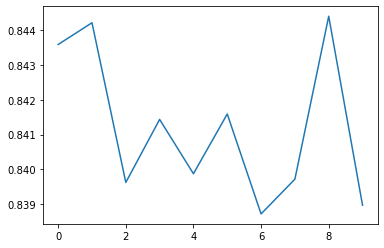

In [41]:
plt.plot(history.history['acc']);

In [45]:
model.evaluate(datagen, steps=100)

100/100 [==============================] - 0s 677us/step - loss: 0.3614 - acc: 0.8384


[0.36141151189804077, 0.8384374976158142]

In [46]:
model.predict(datagen, steps=100)

array([[0.90652764],
       [0.90708345],
       [0.16463456],
       ...,
       [0.2718918 ],
       [0.66187584],
       [0.8683615 ]], dtype=float32)